<a href="https://colab.research.google.com/github/tolerant-code/Admin-Dashboard-Template-Bootstrap/blob/master/T2I_Using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer

# Define the paths
image_dir = "/content/drive/MyDrive/Masters Thesis/TestData/image"
caption_dir = "/content/drive/MyDrive/Masters Thesis/TestData/Captions"

# Define image dimensions
img_width, img_height, channels = 64, 64, 3

# Create lists to store images and corresponding captions
images = []
all_captions = []

# Iterate over each image folder
for class_folder in os.listdir(image_dir):
    class_image_dir = os.path.join(image_dir, class_folder)
    class_caption_dir = os.path.join(caption_dir, class_folder)

    # Iterate through each image file in the class folder
    for image_filename in os.listdir(class_image_dir):
        # Check if the file is an image
        if image_filename.endswith(('.jpg', '.jpeg', '.png')):
            # Load image
            image_path = os.path.join(class_image_dir, image_filename)
            image = load_img(image_path, target_size=(img_width, img_height))
            image = img_to_array(image)
            images.append(image)

            # Extract image name without extension
            image_name = os.path.splitext(image_filename)[0]

            # Find corresponding caption file
            caption_filename = image_name + ".txt"
            caption_path = os.path.join(class_caption_dir, caption_filename)
            # Read captions if caption file exists
            if os.path.exists(caption_path):
                with open(caption_path, "r", encoding="utf-8") as file:
                    captions = file.read().strip().split('\n')
                    all_captions.append(captions)
            else:
                print("No caption file found for", image_filename)
                images.pop()  # Remove the image if no caption file is found

# Convert the lists to NumPy arrays
images = np.array(images)

# Load Pre-Trained Amharic Tokenizer
tokenizer = AutoTokenizer.from_pretrained("Amharic-BERT")

# Tokenize Amharic Captions
caption_sequences = [tokenizer.encode(caption, add_special_tokens=True) for captions in all_captions.ravel()]
caption_tokens = np.array(caption_sequences)

# Extract maximum caption length
max_caption_length = max(len(seq) for seq in caption_sequences)

# Create the Embedding layer
embedding_dim = 100
vocab_size = tokenizer.vocab_size
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_caption_length)

# ... Continue with the rest of your code


No caption file found for Horned_Grebe_0101_35203 (1).jpg
No caption file found for Horned_Grebe_0102_34448 (1).jpg
No caption file found for Horned_Grebe_0112_34864 (1).jpg
No caption file found for Horned_Grebe_0103_34822 (1).jpg
No caption file found for Horned_Grebe_0099_34989 (1).jpg
No caption file found for Horned_Grebe_0114_34517 (1).jpg
No caption file found for Horned_Grebe_0100_34462 (1).jpg
No caption file found for Horned_Grebe_0106_35112 (1).jpg
No caption file found for Horned_Grebe_0110_35012 (1).jpg
No caption file found for Blue_Grosbeak_0067_36965 (1).jpg
No caption file found for Blue_Grosbeak_0073_37148 (1).jpg
No caption file found for Blue_Grosbeak_0072_36774 (1).jpg
No caption file found for Blue_Grosbeak_0066_36632 (1).jpg
No caption file found for Blue_Grosbeak_0065_36847 (1).jpg
No caption file found for Blue_Grosbeak_0074_37155 (1).jpg
No caption file found for Blue_Grosbeak_0071_36948 (1).jpg
No caption file found for Blue_Grosbeak_0075_36963 (1).jpg
No cap

KeyboardInterrupt: 

# **Library**

In [2]:
import os
import json
import matplotlib
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, Concatenate, Reshape, Conv2D, Conv2DTranspose, Dropout

# **Load Dataset Directory**

In [3]:
# Define the paths
image_dir = "/content/drive/MyDrive/Masters Thesis/TestData/image"
caption_dir = "/content/drive/MyDrive/Masters Thesis/TestData/Captions"

# **Preprocess Data**

In [5]:
# Define image dimensions
img_width, img_height, channels = 64, 64, 3
# Create lists to store images and corresponding captions
images = []
all_captions = []

# Iterate over each image folder
for class_folder in os.listdir(image_dir):
    class_image_dir = os.path.join(image_dir, class_folder)
    class_caption_dir = os.path.join(caption_dir, class_folder)

    # Iterate through each image file in the class folder
    for image_filename in os.listdir(class_image_dir):
        # Check if the file is an image
        if image_filename.endswith(('.jpg', '.jpeg', '.png')):
            # Load image
            image_path = os.path.join(class_image_dir, image_filename)
            image = load_img(image_path, target_size=(img_width, img_height))
            image = img_to_array(image)
            images.append(image)

            # Extract image name without extension
            image_name = os.path.splitext(image_filename)[0]

            # Find corresponding caption file
            caption_filename = image_name + ".txt"
            caption_path = os.path.join(class_caption_dir, caption_filename)
            # Read captions if caption file exists
            if os.path.exists(caption_path):
                with open(caption_path, "r", encoding="utf-8") as file:
                    captions = file.read().strip().split('\n')
                    all_captions.append(captions)
            else:
                print("No caption file found for", image_filename)
                images.pop()  # Remove the image if no caption file is found

# Convert the lists to NumPy arrays
images = np.array(images)
all_captions = np.array(all_captions)

# Tokenize the captions
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(all_captions.ravel())
caption_tokens = [tokenizer.texts_to_sequences(captions) for captions in all_captions]

# Pad the caption tokens to a fixed length
max_caption_length = max(len(seq) for captions in caption_tokens for seq in captions)
caption_tokens = [pad_sequences(captions, maxlen=max_caption_length, padding='post') for captions in caption_tokens]
caption_tokens = np.array(caption_tokens)

# Create the Embedding layer
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_caption_length)

KeyboardInterrupt: 

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(caption_tokens, images, test_size=0.2, random_state=42)
# Continue with the rest of your GAN implementation
print(X_train.shape)
print(y_train.shape)

(2788, 10, 90)
(2788, 64, 64, 3)


# **Define The Generator Model**

In [ ]:
def build_generator(embedding_dim):
    # Input layer for the random noise
    noise_input = Input(shape=(100,))

    # Dense layer to map the noise to a higher dimensional space
    dense = Dense(256 * 8 * 8)(noise_input)
    dense = Reshape((8, 8, 256))(dense)
    # Transposed convolutional layers to upsample the image
    generator = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(dense)
    generator = Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(generator)
    generator = Conv2DTranspose(32, kernel_size=4, strides=2, padding='same')(generator)
    # Output layer with 3 channels for RGB image
    generator_output = Conv2D(channels, kernel_size=3, activation='tanh', padding='same')(generator)
    # Model
    generator_model = Model(inputs=noise_input, outputs=generator_output)
    return generator_model

# **Define The Discriminator Model**

In [ ]:
def build_discriminator(img_shape):
    # Input layer for the image
    image_input = Input(shape=img_shape)

    # Convolutional layers
    discriminator = Conv2D(32, kernel_size=3, strides=2, padding='same')(image_input)
    discriminator = Dropout(0.5)(discriminator)
    discriminator = Conv2D(64, kernel_size=3, strides=2, padding='same')(discriminator)
    discriminator = Dropout(0.5)(discriminator)
    discriminator = Conv2D(128, kernel_size=3, strides=2, padding='same')(discriminator)
    discriminator = Dropout(0.5)(discriminator)

    # Flatten the output and add a dense layer
    discriminator = Flatten()(discriminator)
    discriminator_output = Dense(1, activation='sigmoid')(discriminator)

    # Model
    discriminator_model = Model(inputs=image_input, outputs=discriminator_output)

    return discriminator_model


# **Defining The Generator and Discriminator models**

In [ ]:
generator = build_generator(embedding_dim)
discriminator = build_discriminator((img_width, img_height, channels))

# Compile Discriminator
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# The Discriminator should not be trainable during the GAN training
discriminator.trainable = False

# Input for the GAN model (noise)
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)

# Output of the GAN model
gan_output = discriminator(generated_image)

# GAN model
gan_model = Model(gan_input, gan_output)
gan_model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# **Generator Model Summary**

In [ ]:
print("Generator Model:")
generator.summary()

Generator Model:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 16384)             1654784   
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       524416    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 64)        131136    
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 64, 64, 

# **Discriminator Model Summary**

In [ ]:
print("\nDiscriminator Model:")
discriminator.summary()


Discriminator Model:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 dropout_2 (Dropout)         (None, 8

# **Training The GAN Model**

In [ ]:
# Set up training parameters
epochs =500
batch_size = 64

# Initialize lists to store discriminator and generator losses during training
d_losses = []
g_losses = []

import cv2
import numpy as np

# Training loop
for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, size=(batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = images[np.random.randint(0, X_train.shape[0], batch_size)]
    #real_images = images[np.random.randint(0, images.shape[0], batch_size)]
    resized_real_images = []
    for image in real_images:
        if len(image.shape) < 3:  # Check if the image is grayscale
            image = np.stack((image,) * 3, axis=-1)  # Convert grayscale to RGB by stacking channels

        # Normalize pixel values to the range [0, 1]
        image = image.astype(np.float32) / 255.0

        # Resize real images to (64, 64)
        resized_image = cv2.resize(image, (64, 64))
        resized_real_images.append(resized_image)

    real_images_resized = np.array(resized_real_images)

    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images_resized, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, size=(batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan_model.train_on_batch(noise, labels_gan)

    # Append discriminator and generator losses to the lists
    d_losses.append(d_loss[0])  # assuming d_loss is a tuple (loss, accuracy)
    g_losses.append(g_loss)

    # Print progress
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

2/2 [==============================] - 1s 348ms/step
Epoch 0, D Loss: 0.6926074922084808, G Loss: 0.6906428933143616
2/2 [==============================] - 0s 214ms/step
Epoch 20, D Loss: 0.49936413392424583, G Loss: 0.6308572888374329
2/2 [==============================] - 0s 206ms/step
Epoch 40, D Loss: 0.7183813750743866, G Loss: 0.733960747718811
2/2 [==============================] - 0s 217ms/step
Epoch 60, D Loss: 0.6295046210289001, G Loss: 0.7018495798110962
2/2 [==============================] - 0s 203ms/step
Epoch 80, D Loss: 0.7095030248165131, G Loss: 0.7800735831260681
2/2 [==============================] - 1s 327ms/step
Epoch 100, D Loss: 0.7952280938625336, G Loss: 0.7252811193466187
2/2 [==============================] - 0s 200ms/step
Epoch 120, D Loss: 0.7159924507141113, G Loss: 0.8182538151741028
2/2 [==============================] - 0s 203ms/step
Epoch 140, D Loss: 0.7248084843158722, G Loss: 0.7085717916488647
2/2 [==============================] - 0s 196ms/step
E

# **Evaluate The Generator and Discriminator Loss**

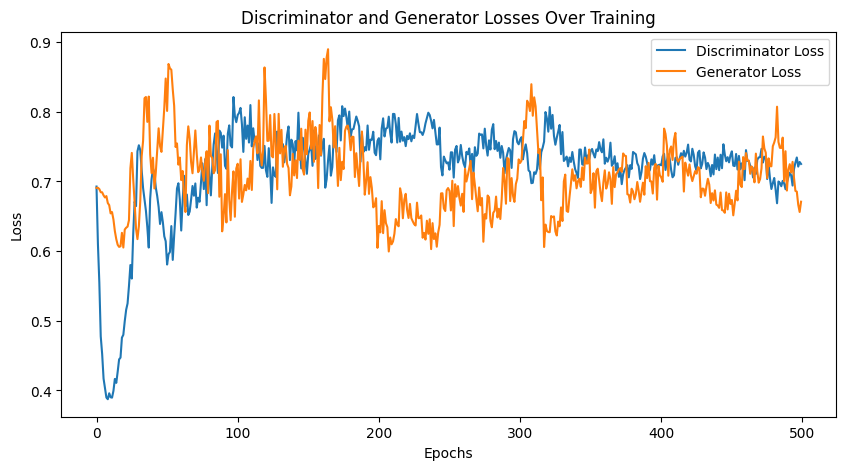

In [ ]:
# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Discriminator and Generator Losses Over Training')
plt.show()

# **Generate Image from New Text**

In [ ]:
# Example: Convert Amharic text to embeddings
amharic_text = ["መካከለኛ መጠን ያለው ጥቁር ግራጫ ቀለም ወፍ"]
amharic_sequences = tokenizer.texts_to_sequences(amharic_text)

# Define max_caption_length or replace it with a specific value
max_caption_length = 20  # Example value, adjust according to your needs
# Pad sequences
amharic_padded = pad_sequences(amharic_sequences, padding='post', maxlen=max_caption_length)

# Ensure the shape is compatible with the generator input
amharic_embeddings = np.random.normal(0, 1, size=(len(amharic_text), 100))  # Adjust the size to match the generator input


1/1 [==============================] - 0s 136ms/step


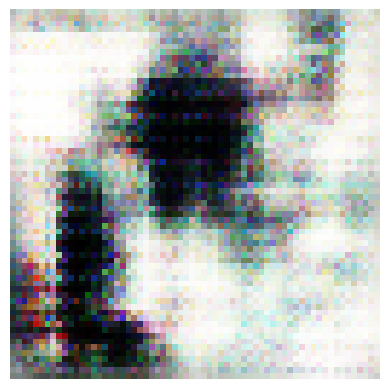

In [ ]:
# Generate images from Amharic text embeddings
generated_images = generator.predict(amharic_embeddings)

# Display the generated images
import matplotlib.pyplot as plt

# Assuming you want to display the first generated image
generated_image = generated_images[0]  # Assuming there's only one generated image

# Rescale the image from (-1, 1) to (0, 1) for display
generated_image = (generated_image + 1) / 2.0

# Show the image
plt.imshow(generated_image)
plt.axis('off')
plt.show()


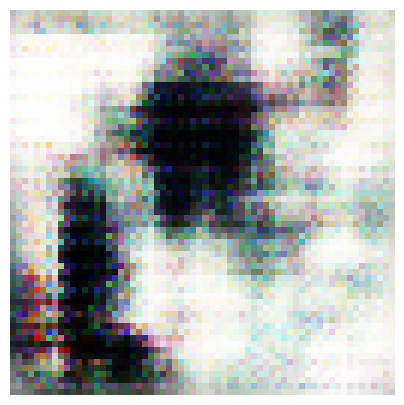

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(5, 5))
    axs = np.ravel(axs)
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

# Rescale images to 0-1 range for visualization
generated_images_rescaled = 0.5 * generated_images + 0.5

plot_generated_images(generated_images_rescaled)


# **The End**

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

# Assuming you have the 'images' and 'generated_images' variables containing the respective image data

# Evaluate the model using evaluation metrics
evaluation_metrics = {}

# Calculate SSIM
ssim_scores = []
for i in range(len(amharic_text)):
    ssim_score = ssim(images[i], generated_images[i], channel_axis=2)
    ssim_scores.append(ssim_score)
evaluation_metrics['SSIM'] = np.mean(ssim_scores)

# Calculate PSNR
psnr_scores = []
for i in range(len(amharic_text)):
    psnr_score = psnr(images[i], generated_images[i], data_range=255)
    psnr_scores.append(psnr_score)
evaluation_metrics['PSNR'] = np.mean(psnr_scores)

# Calculate MSE
mse_scores = []
for i in range(len(amharic_text)):
    mse_score = mse(images[i], generated_images[i])
    mse_scores.append(mse_score)
evaluation_metrics['MSE'] = np.mean(mse_scores)

# Print evaluation metrics
print("Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics:
SSIM: -3.543477214407176e-05
PSNR: 2.1512098897818346
MSE: 39624.09643056873


In [ ]:
import numpy as np

def calculate_inception_score(scores, n_split=10):
    # Split scores into batches
    n_scores = len(scores)
    batch_size = n_scores // n_split

    # Split scores into batches
    score_batches = np.array_split(scores, n_split)

    # Calculate softmax probabilities for each batch
    softmaxes = [np.exp(batch - np.max(batch, axis=1, keepdims=True)) / np.sum(np.exp(batch - np.max(batch, axis=1, keepdims=True)), axis=1, keepdims=True)
                 for batch in score_batches]

    # Calculate marginal distribution (average softmax probabilities across batches)
    p_marginal = np.mean(softmaxes, axis=0)

    # Calculate KL divergence for each batch and average them
    kl_divs = [np.sum(batch * (np.log(batch) - np.log(p_marginal)), axis=1)
               for batch in softmaxes]
    kl_divs = np.concatenate(kl_divs)
    mean_kl_div = np.mean(kl_divs)

    # Calculate Inception Score
    inception_score = np.exp(mean_kl_div)

    return inception_score

# Example usage
generated_scores = np.random.rand(1000, 10)  # Replace with your actual generated scores
inception_score = calculate_inception_score(generated_scores)
print("Inception Score:", inception_score)

Inception Score: 1.0337193702443532


In [ ]:
import numpy as np
from scipy import linalg
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

def calculate_fid(real_features, generated_features):
    mu_real, sigma_real = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu_generated, sigma_generated = generated_features.mean(axis=0), np.cov(generated_features, rowvar=False)

    # Handle NaN values
    sigma_real = np.where(np.isnan(sigma_real), 0, sigma_real)
    sigma_generated = np.where(np.isnan(sigma_generated), 0, sigma_generated)

    # Calculate the Fréchet Distance
    eps = 1e-6
    sqrt_cov_product = linalg.sqrtm(sigma_real.dot(sigma_generated), disp=False)[0]
    fid = np.sum((mu_real - mu_generated)**2) + np.trace(sigma_real + sigma_generated - 2 * sqrt_cov_product)
    fid += eps * np.eye(sigma_real.shape[0]).sum()
    fid = np.real(fid)

    return fid


# Example usage
real_features = np.random.rand(1000, 2048)  # Replace with your actual real features
generated_features = np.random.rand(1000, 2048)  # Replace with your actual generated features

fid = calculate_fid(real_features, generated_features)
print("FID:", fid)

FID: 1.9324889771013579e+71


# **StackGAN**

In [29]:
from amseg.amharicSegmenter import AmharicSegmenter
sent_punct = []
word_punct = []
segmenter = AmharicSegmenter(sent_punct,word_punct)
words = segmenter.amharic_tokenizer("እአበበ በሶ በላ።")
sentences = segmenter.tokenize_sentence("እአበበ በሶ በላ። ከበደ ጆንያ፤ ተሸከመ፡!ለምን?")


from amseg.amharicNormalizer import AmharicNormalizer as normalizer
from amseg.amharicRomanizer import AmharicRomanizer as romanizer
normalized = normalizer.normalize('ሑለት ሦስት')
romanized = romanizer.romanize('ሑለት ሦስት')

['እአበበ', 'በሶ', 'በላ', '።']

In [36]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Embedding
from amseg.amharicSegmenter import AmharicSegmenter
from amseg.amharicNormalizer import AmharicNormalizer as normalizer
from amseg.amharicRomanizer import AmharicRomanizer as romanizer

# Define the paths
image_dir = "/content/drive/MyDrive/Masters Thesis/TestData/image"
caption_dir = "/content/drive/MyDrive/Masters Thesis/TestData/Captions"

# Define image dimensions
img_width, img_height, channels = 32, 32, 3

# Create lists to store images and corresponding captions
images = []
all_captions = []

# Initialize Amharic Segmenter
sent_punct = []
word_punct = []
segmenter = AmharicSegmenter(sent_punct, word_punct)

# Iterate over each image folder
for class_folder in os.listdir(image_dir):
    class_image_dir = os.path.join(image_dir, class_folder)
    class_caption_dir = os.path.join(caption_dir, class_folder)

    # Iterate through each image file in the class folder
    for image_filename in os.listdir(class_image_dir):
        # Check if the file is an image
        if image_filename.endswith(('.jpg', '.jpeg', '.png')):
            # Load image
            image_path = os.path.join(class_image_dir, image_filename)
            image = load_img(image_path, target_size=(img_width, img_height))
            image = img_to_array(image)
            images.append(image)

            # Extract image name without extension
            image_name = os.path.splitext(image_filename)[0]

            # Find corresponding caption file
            caption_filename = image_name + ".txt"
            caption_path = os.path.join(class_caption_dir, caption_filename)
            # Read captions if caption file exists
            if os.path.exists(caption_path):
                with open(caption_path, "r", encoding="utf-8") as file:
                    captions = file.read().strip().split('\n')
                    # Tokenize and normalize Amharic captions
                    captions = [[normalizer.normalize(caption)] for caption in captions]
                    all_captions.append(captions)
            else:
                print("No caption file found for", image_filename)
                images.pop()  # Remove the image if no caption file is found

# Convert the lists to NumPy arrays
images = np.array(images)

# Tokenize Amharic Captions
tokenized_captions = [[segmenter.tokenize_sentence(caption[0]) for caption in captions] for captions in all_captions]

# Extract maximum caption length
max_caption_length = max([len(sentence) for captions in tokenized_captions for sentence in captions])

# Create the Embedding layer
embedding_dim = 100
vocab_size = len(set([token for captions in tokenized_captions for sentence in captions for token in sentence]))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_caption_length)

# Example of Romanization
normalized = normalizer.normalize('ሑለት ሦስት')
romanized = romanizer.romanize('ሑለት ሦስት')


No caption file found for Horned_Grebe_0101_35203 (1).jpg
No caption file found for Horned_Grebe_0102_34448 (1).jpg
No caption file found for Horned_Grebe_0112_34864 (1).jpg
No caption file found for Horned_Grebe_0103_34822 (1).jpg
No caption file found for Horned_Grebe_0099_34989 (1).jpg
No caption file found for Horned_Grebe_0114_34517 (1).jpg
No caption file found for Horned_Grebe_0100_34462 (1).jpg
No caption file found for Horned_Grebe_0106_35112 (1).jpg
No caption file found for Horned_Grebe_0110_35012 (1).jpg
No caption file found for Blue_Grosbeak_0067_36965 (1).jpg
No caption file found for Blue_Grosbeak_0073_37148 (1).jpg
No caption file found for Blue_Grosbeak_0072_36774 (1).jpg
No caption file found for Blue_Grosbeak_0066_36632 (1).jpg
No caption file found for Blue_Grosbeak_0065_36847 (1).jpg
No caption file found for Blue_Grosbeak_0074_37155 (1).jpg
No caption file found for Blue_Grosbeak_0071_36948 (1).jpg
No caption file found for Blue_Grosbeak_0075_36963 (1).jpg
No cap

In [43]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, BatchNormalization, Reshape, concatenate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2DTranspose, Conv2D

# Define Stage-I Generator
def build_stage_one_generator():
    input_text = Input(shape=(max_caption_length,))
    text_embedding = embedding_layer(input_text)
    lstm_out = LSTM(256)(text_embedding)

    # Define image generation network
    img_input = Input(shape=(100,))
    merged = concatenate([lstm_out, img_input])
    generator = Dense(128 * 8 * 8, activation="relu")(merged)
    generator = Reshape((8, 8, 128))(generator)
    generator = Conv2DTranspose(128, kernel_size=4, strides=2, padding="same")(generator)
    generator = Conv2DTranspose(64, kernel_size=4, strides=2, padding="same")(generator)
    generator = Conv2DTranspose(3, kernel_size=4, strides=2, padding="same")(generator)

    return Model(inputs=[input_text, img_input], outputs=generator)

from keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense

def build_stage_one_discriminator():
    input_image = Input(shape=(64, 64, 3))  # Increase the input size to prevent downsampling issues
    discriminator = Conv2D(64, kernel_size=4, strides=2, padding="same")(input_image)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(128, kernel_size=4, strides=2, padding="same")(discriminator)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(256, kernel_size=4, strides=2, padding="same")(discriminator)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(512, kernel_size=4, strides=2, padding="same")(discriminator)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Flatten()(discriminator)
    discriminator = Dense(1, activation='sigmoid')(discriminator)  # Output a single value (real/fake)

    return Model(inputs=input_image, outputs=discriminator)
# Compile Stage-I Discriminator
stage_one_discriminator = build_stage_one_discriminator()
stage_one_discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# Define Stage-I GAN
stage_one_generator = build_stage_one_generator()
stage_one_generator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))
# Define the input layer for text sequence
input_text = Input(shape=(max_caption_length,))


def build_stage_two_generator(stage_one_generator, input_text):
    noise_input = Input(shape=(100,))
    stage_one_output = stage_one_generator([input_text, noise_input])
    # Add refinement layers for Stage-II GAN
    return Model(inputs=[input_text, noise_input], outputs=stage_one_output)


# Compile Stage-II GAN
stage_two_generator = build_stage_two_generator(stage_one_generator, input_text)
stage_two_generator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

def build_stage_two_discriminator():
    input_image = Input(shape=(64, 64, 3))  # Increase input size to prevent downsampling issues
    discriminator = Conv2D(64, kernel_size=4, strides=2, padding="same")(input_image)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(128, kernel_size=4, strides=2, padding="same")(discriminator)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(256, kernel_size=4, strides=2, padding="same")(discriminator)
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Conv2D(512, kernel_size=4, strides=1, padding="same")(discriminator)  # Reduced downsampling
    discriminator = LeakyReLU(alpha=0.2)(discriminator)
    discriminator = Flatten()(discriminator)
    discriminator = Dense(1, activation='sigmoid')(discriminator)  # Output a single value (real/fake)

    return Model(inputs=input_image, outputs=discriminator)


    return Model(inputs=input_image, outputs=discriminator)

# Compile Stage-II Discriminator
stage_two_discriminator = build_stage_two_discriminator()
stage_two_discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])
